# House Price Prediction

In this project we are going to predict the prices of houses in California. The dataset for this project is collected from Kaggle. There are 20640 rows and 10 columns in this dataset, 9 columns are the feature columns and 1 column is the target column.

The feature columns are:

- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- ocean_proximity

The target column is:

- median_house_value

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
import seaborn as sb
%matplotlib inline

###### function to load data

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
path = '../data/raw/data.csv'
data = load_data(path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.shape

(20640, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


###### The **ocean_proximity** column is of object type and **total_bedrooms** columns have some null values

In [6]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Preparation

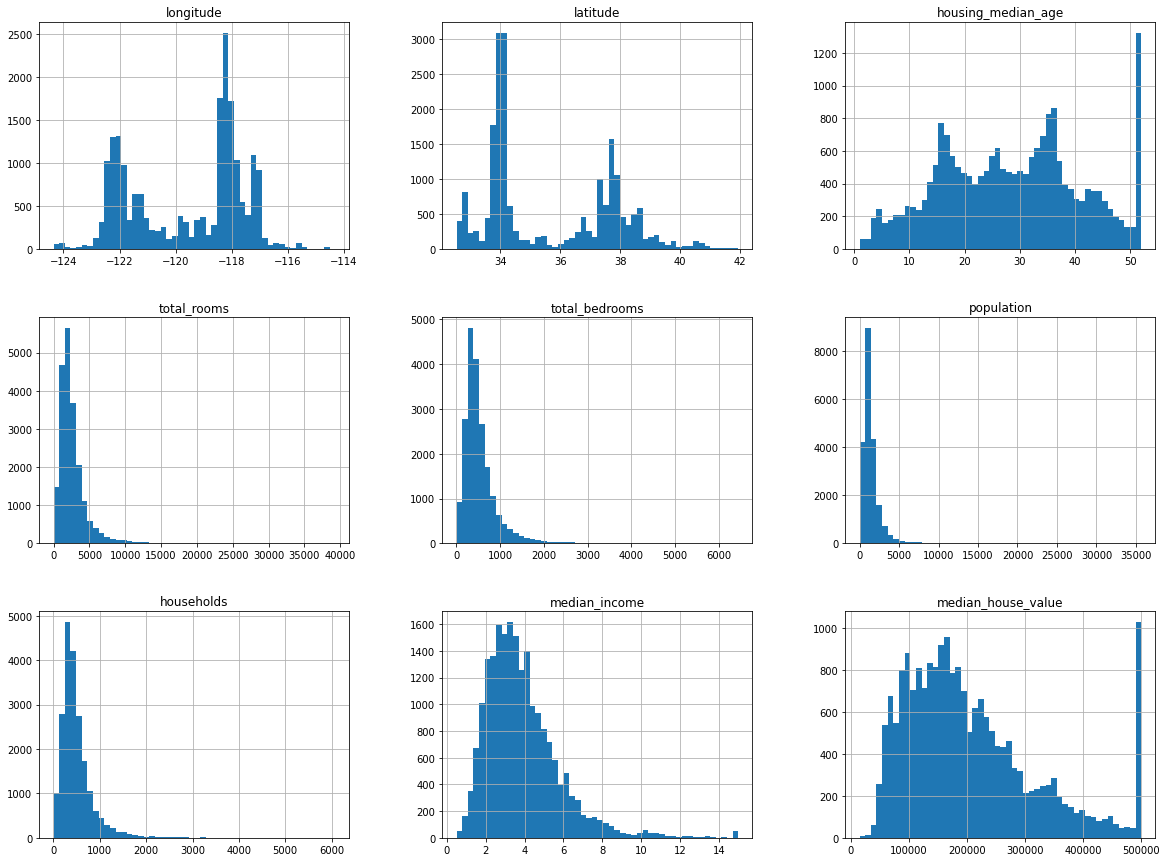

In [8]:
data.hist(bins=50, figsize=(20, 15))
plt.show();

Separate the median_income column to separate bins

In [9]:
data['income_cat'] = pd.cut(data["median_income"],
                             bins=[0., 1., 3.0, 4.5, 6.0, np.inf],
                             labels=[1, 2, 3, 4, 6])

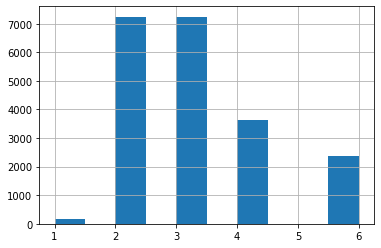

In [10]:
data['income_cat'].hist();

split the data into train and test using StritifiedShuffleSplit

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['income_cat']):
    train_data = data.loc[train_index]
    test_data = data.loc[test_index]

In [15]:
test_data['income_cat'].value_counts()/len(test_data)

2    0.351017
3    0.350533
4    0.176357
6    0.114341
1    0.007752
Name: income_cat, dtype: float64

let's create a copy of the data to explore more without causing harm to our training data

In [16]:
housing = train_data.copy()

# Exploratory Data Analysis

##### Visualize the geographical data

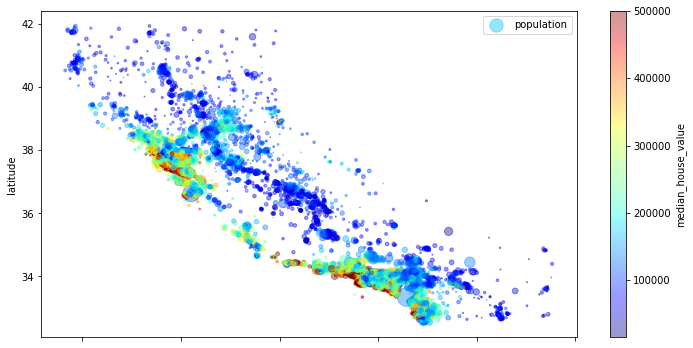

In [29]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', c='median_house_value',
             cmap='jet', colorbar=True, figsize=(12, 6))
plt.legend();

##### Find the correlation between every pair of attributes

In [30]:
corr_matrix = housing.corr()

In [35]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.692108
total_rooms           0.134784
housing_median_age    0.113154
households            0.064226
total_bedrooms        0.048168
population           -0.023570
longitude            -0.045320
latitude             -0.146321
Name: median_house_value, dtype: float64

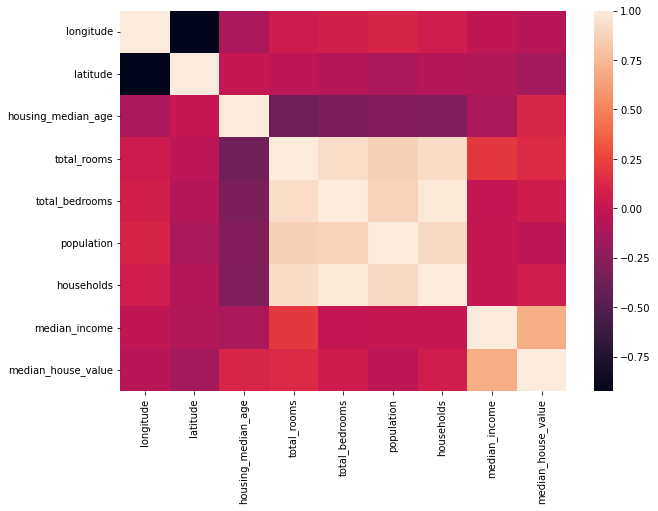

In [39]:
plt.figure(figsize=(10, 7))
sb.heatmap(corr_matrix);

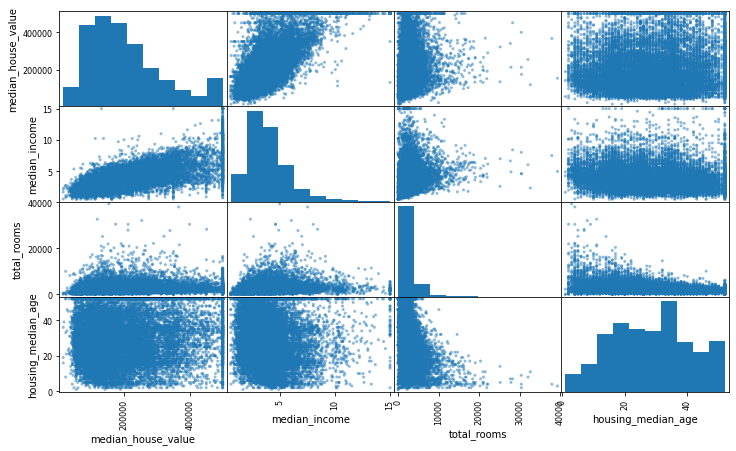

In [45]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 7));

The most promising attribute to predict median_house_value is median_income as you can see in the plot above

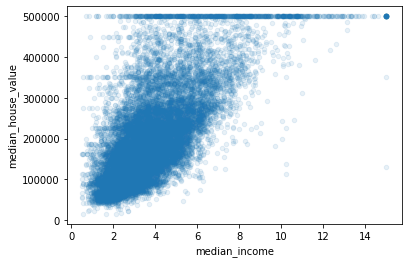

In [48]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);